In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
print(tf.__version__)

2.9.2


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("hin.txt",sep='\t',header=None)
df.columns =['English','Hindi' ,'Attribution']

In [3]:
df.drop(['Attribution'], axis=1,inplace =True)

In [4]:
df.head(20)

,English,Hindi
0,Wow!,वाह!
1,Duck!,झुको!
2,Duck!,बतख़!
3,Help!,बचाओ!
4,Jump.,उछलो.
5,Jump.,कूदो.
6,Jump.,छलांग.
7,Hello!,नमस्ते।
8,Hello!,नमस्कार।
9,Cheers!,वाह-वाह!


In [5]:
# For extra spaces and making english column lower case
df.English = df.English.apply(lambda x: " ".join(x.split()))
df.Hindi = df.Hindi.apply(lambda x: " ".join(x.split()))
df.English = df.English.apply(lambda x: x.lower())
df


,English,Hindi
0,wow!,वाह!
1,duck!,झुको!
2,duck!,बतख़!
3,help!,बचाओ!
4,jump.,उछलो.
...,...,...
2904,"if you go to that supermarket, you can buy mos...",उस सूपरमार्केट में तुम लगभग कोई भी रोजाने में ...
2905,the passengers who were injured in the acciden...,जिन यात्रियों को दुर्घटना मे चोट आई थी उन्हे अ...
2906,"democracy is the worst form of government, exc...","लोकतंत्र सरकार का सबसे घिनौना रूप है, अगर बाकी..."
2907,if my boy had not been killed in the traffic a...,अगर मेरा बेटा ट्रेफ़िक हादसे में नहीं मारा गया...


In [6]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
def expand(text):
    expand = []
    for word in text.split():
        expand.append(contractions.fix(word))
    text = ' '.join(expand)
    return text



In [8]:
df.English = df.English.apply(lambda x: expand(x))
df.head(20)

,English,Hindi
0,wow!,वाह!
1,duck!,झुको!
2,duck!,बतख़!
3,help!,बचाओ!
4,jump.,उछलो.
5,jump.,कूदो.
6,jump.,छलांग.
7,hello!,नमस्ते।
8,hello!,नमस्कार।
9,cheers!,वाह-वाह!


In [9]:
import string
cleaner= str.maketrans('','', string.punctuation)
df.English= df.English.apply(lambda x: x.translate(cleaner))
df.Hindi= df.Hindi.apply(lambda x: x.translate(cleaner))


In [10]:
df.English = df.English.str.replace('\d+', '')
df.Hindi = df.Hindi.str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [11]:
df.tail(30)

,English,Hindi
2879,it is not till we lose our health that we real...,हम जब तक अपनी सेहत नहीं खो देते हैं हमे तब तक ...
2880,she wanted to have her hair cut but her mother...,वह अपने बाल कटवाना चाहती थी पर उसकी मम्मी राज़...
2881,you might as well read a novel instead of star...,छत पर घूरने के बजाए उपन्यास ही पढ़लो।
2882,do not you think the air conditioner is turned...,तुम्हें नहीं लगता कि एसी कुछ ज़्यादा ही तेज़ च...
2883,it will not make much difference whether you g...,तुम आज जाओ या कल इससे ज़्यादा फ़र्क नहीं पड़ेगा।
2884,the boy gathered a handful of peanuts and put ...,उस लड़के ने एक मुट्ठीभर मूँगफलियाँ लीं और उन्ह...
2885,there is a rumor in the air that the firm is g...,हवा में एक अफ़वाह है कि उस कारोबार का दिवालिया...
2886,when you leave the room please make sure you t...,कमरे से निकलने से पहले कृपया बत्तियाँ बंद कर द...
2887,if tom does not help us we will never be able ...,अगर टॉम हमारी मदद नहीं करेगा तो हम ये समय पर क...
2888,you must not be afraid of making mistakes when...,कोई भी नई भाषा सीखने में ग़लतियों से डरना नहीं...


In [12]:
df.to_csv("EnglishHindi.csv",index=None,columns=['English', 'Hindi'])

**Prepare Data for modeling **

In [13]:
df = pd.read_csv("EnglishHindi.csv")

In [14]:
# adding special tokens at end and start
df['Hindi'] =df.Hindi.apply(lambda x: 'sos '+ x + ' eos')

In [15]:
eng_texts = df.English.to_list()
hin_texts = df.Hindi.to_list()

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
def tokenize_gen(text):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)
  return tokenizer, tokenizer.texts_to_sequences(text)

In [18]:
# Tokenize english and Hindi sentences
e_tokenizer, e_encoded= tokenize_gen(text= eng_texts)
h_tokenizer, h_encoded= tokenize_gen(text= hin_texts)

In [19]:
e_index_word = e_tokenizer.index_word
e_word_index= e_tokenizer.word_index


In [20]:
E_VOC_SIZE = len(e_tokenizer.word_counts)+1
h_word_index= h_tokenizer.word_index
hin_index_word = h_tokenizer.index_word
H_VOC_SIZE=len(h_tokenizer.word_counts)+1


In [21]:
# Finding max length of English and Hindi sentences
maxenglen = 0
for i in range(len(e_encoded)):
  if len(e_encoded[i]) > maxenglen:
    maxenglen= len(e_encoded[i])

maxhinlen = 0
for i in range(len(h_encoded)):
  if len(e_encoded[i]) > maxhinlen:
    maxhinlen= len(h_encoded[i])


Padding


In [22]:
from keras_preprocessing.sequence import pad_sequences
# Padding both
e_padded = pad_sequences(e_encoded, maxlen=maxenglen, padding='post')
h_padded = pad_sequences(h_encoded, maxlen=maxhinlen, padding='post')

# Convert to array
e_padded= np.array(e_padded)
h_padded= np.array(h_padded)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(e_padded, h_padded, test_size=0.1, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2618, 23), (291, 23), (2618, 27), (291, 27))

Build Model

In [25]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Concatenate
from tensorflow.keras import Input, Model

encoderinputs = Input(shape=(maxenglen,)) 

enc_emb = Embedding(E_VOC_SIZE, 1024)(encoderinputs)
enclstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True))
encoderoutputs1, forwstateh, forwstatec, backstateh, backstatec = enclstm1(enc_emb)

# Concatenate both h and c 
finalench = Concatenate()([forwstateh,backstateh])
finalencc = Concatenate()([forwstatec,backstatec])

# get Context vector
encoder_states =[finalench, finalencc]

In [26]:
encoderoutputs1

<KerasTensor: shape=(None, 23, 512) dtype=float32 (created by layer 'bidirectional')>

Decoder

In [27]:
# We are using borrowed code from the web 
# below is the link
# https://colab.research.google.com/drive/1XrjPL3O_szhahYZW0z9yhCl9qvIcJJYW 

import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
 
 
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """
 
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
 
    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.
 
        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)
 
        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end
 
    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)
 
        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """
 
            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg
 
            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]
 
            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)
 
            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)
 
            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)
 
            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)
 
            if verbose:
                print('ei>', e_i.shape)
 
            return e_i, [e_i]
 
        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]
 
        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state
 
        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim
 
        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )
 
        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )
 
        return c_outputs, e_outputs
 
    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [28]:
#  decoder input
decoderinputs = Input(shape=(None,)) 
dec_e_layer = Embedding(H_VOC_SIZE, 1024) 
dec_e = dec_e_layer(decoderinputs)  
decoder_lstm = LSTM(512, return_sequences=True, return_state=True) 
decoder_out, _, _ = decoder_lstm(dec_e, initial_state=encoder_states)
attention = AttentionLayer()
attentionresult, attentionweights = attention([encoderoutputs1, decoder_out])
decoder_con_input = Concatenate(axis=-1, name='concat_layer')([decoder_out, attentionresult])
decoder_dense = Dense(H_VOC_SIZE, activation='softmax')
decoder_out = decoder_dense(decoder_con_input)
model = Model([encoderinputs, decoderinputs], decoder_out) 

Training

In [32]:
from tensorflow.keras.callbacks import Modelchkpoint, EarlyStopping
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
chkpoint = Modelchkpoint("give Your path to save check points", monitor='val_accuracy')
earlystop = EarlyStopping(monitor='val_accuracy', patience=5)
cb_list = [chkpoint, earlystop]
en_inputdata = X_train
en_inputdata = y_train[:,:-1]
dec_targetdata =  y_train[:,1:]

en_inputtest = X_test
dec_inputtest = y_test[:,:-1]
dec_targettest=  y_test[:,1:]

EPOCHS= 5
history = model.fit([en_inputdata, en_inputdata],dec_targetdata, 
                    epochs=EPOCHS, 
                    batch_size=128,
                    validation_data = ([en_inputtest, dec_inputtest],dec_targettest),
                    callbacks= cb_list)

model.save_weights("model.h5") 

Epoch 1/5
21/21 [==============================] - ETA: 0s - loss: 1.4416 - accuracy: 0.7664

21/21 [==============================] - 185s 8s/step - loss: 1.4416 - accuracy: 0.7664 - val_loss: 1.4813 - val_accuracy: 0.7745
Epoch 2/5
21/21 [==============================] - ETA: 0s - loss: 1.3049 - accuracy: 0.7765

21/21 [==============================] - 172s 8s/step - loss: 1.3049 - accuracy: 0.7765 - val_loss: 1.4401 - val_accuracy: 0.7843
Epoch 3/5
21/21 [==============================] - ETA: 0s - loss: 1.2077 - accuracy: 0.7853

21/21 [==============================] - 172s 8s/step - loss: 1.2077 - accuracy: 0.7853 - val_loss: 1.4289 - val_accuracy: 0.7867
Epoch 4/5
21/21 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.7943

21/21 [==============================] - 171s 8s/step - loss: 1.1084 - accuracy: 0.7943 - val_loss: 1.3978 - val_accuracy: 0.7901
Epoch 5/5
21/21 [==============================] - ETA: 0s - loss: 1.0107 - accuracy: 0.8044

21/21 [==============================] - 177s 8s/step - loss: 1.0107 - accuracy: 0.8044 - val_loss: 1.4026 - val_accuracy: 0.7947


In [40]:
model.load_weights("model.h5")
encoder_model = Model(encoderinputs, outputs = [encoderoutputs1, finalench, finalencc])
dec_state_h = Input(shape=(512,)) 
dec_state_c = Input(shape=(512,))
dec_hidden_stateinput = Input(shape=(23,512)) 
dec_states = [dec_state_h, dec_state_c]
dec_e2 = dec_e_layer(decoderinputs)
dec_out2, state_h2, state_c2 = decoder_lstm(dec_e2, initial_state=dec_states)
aresult_inf, aweights_inf = attention([dec_hidden_stateinput, dec_out2])
dec_coninputinf = Concatenate(axis=-1, name='concat_layer')([dec_out2, aresult_inf])
dec_states2= [state_h2, state_c2]
dec_out2 = decoder_dense(dec_coninputinf)
decoder_model= Model(
                    [decoderinputs] + [dec_hidden_stateinput, dec_state_h, dec_state_c],
                     [dec_out2]+ dec_states2)

In [43]:
def predicte_sentence(input_seq):
    enc_output, enc_h, enc_c = encoder_model.predict(input_seq)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = h_word_index['sos']
    stop_condition = False
    dec_sentence = ''
    while not stop_condition:
        out_tokens, h, c = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        stoken_Index = np.argmax(out_tokens[0, -1, :])
        s_char = hin_index_word[stoken_Index]
        dec_sentence += ' '+s_char
        if (s_char == 'eos' or len(dec_sentence.split()) >= 36):
            stop_condition = True
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = stoken_Index
        enc_h, enc_c = h, c
    
    return dec_sentence

In [44]:
def hindi_sentence(input_sequence):
    sentence =''
    for i in input_sequence:
      if i!=0 :
        sentence =sentence +hin_index_word[i]+' '
    return sentence 

def english_sentence(input_sequence):
    sentence =''
    for i in input_sequence:
      if i!=0:
        sentence =sentence +e_index_word[i]+' '
    return sentence     


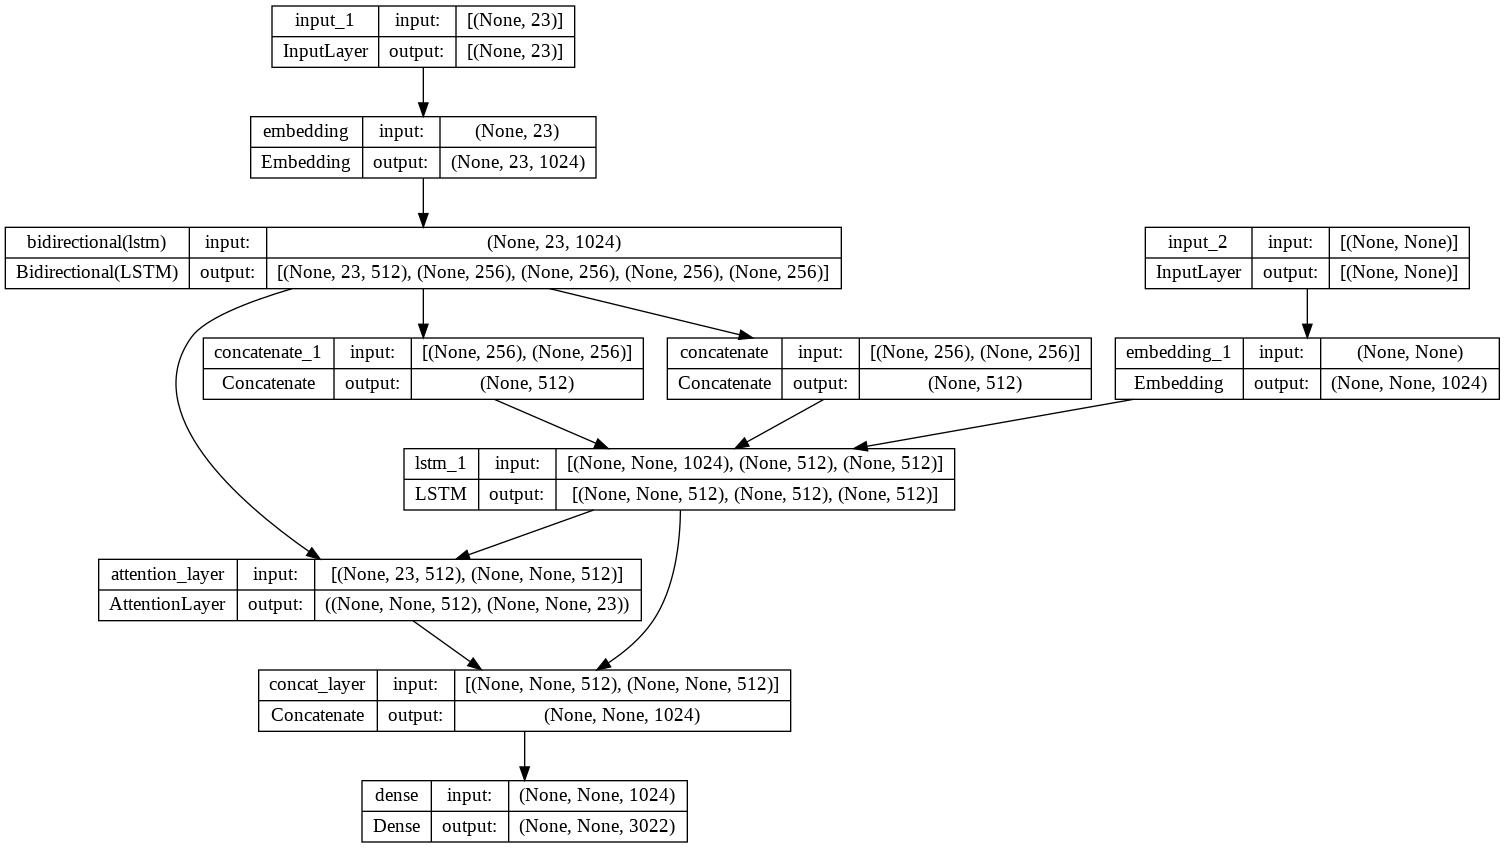

In [33]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
for i in np.random.randint(10, 100, size=15):
  print("English Sentence:",english_sentence(X_test[i]))
  print("Actual Hindi Sentence:",hindi_sentence(y_test[i])[4:-4])
  print("Predicted Hindi Translation:",predicte_sentence(X_test[i].reshape(1,23))[:-4])
  print("----------------------------------------------------------------------------------------")
   

English Sentence: he prefers french to german 
Actual Marathi Sentence: उसे फ़्रानसीसी जर्मन से ज़्यादा अच्छी लगती है। 
1/1 [==============================] - 0s 30ms/step
Predicted Marathi Translation:  वह एक प्रस्ताव से खुश था।
----------------------------------------------------------------------------------------
English Sentence: my stomach is growling 
Actual Marathi Sentence: मेरा पेट गुड़गुड़ा रहा है। 
1/1 [==============================] - 0s 25ms/step
Predicted Marathi Translation:  मेरी मेरा जन्मदिन है।
----------------------------------------------------------------------------------------
English Sentence: this machine is superior in quality to that one 
Actual Marathi Sentence: यह मशीन उस मशीन से बेहतर है। 
1/1 [==============================] - 0s 25ms/step
Predicted Marathi Translation:  यह यह यह यह यह बर्बादी है।
----------------------------------------------------------------------------------------
English Sentence: come with us 
Actual Marathi Sentence: हमारे साथ आओ